## Observations and Insights 

Some Observations: 
- Capomulin stands out to be the best drug regimen out of all other drugs. 
- There were 230 mice that were given Capomulin drug.
- Gender: Male exceeds Female by 0.4%. Male: 50.2% Female: 49.8%
- We specifically analyzed the treatment of Mouse ID: l509.
    - As number of days of treatment increased, the tumor volume of the mice decreased(Good Sign)
    - It basically means that the Capomulin Drug works with preventing the tumor volume on Mice.
- Scatter plot was positively correlated.
    - As the weight of mice increases, there are chances of getting tumor.
    - Weight Gain is one of the problems.
- Correlation seems to be very strong. The number is 0.95, which is very close to 1.00 so it makes strong relationship between mouse weight and tumor volume. 

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
combined_data_df.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [99]:
# Checking the number of mice in the DataFrame.
mouse_metadata["Mouse ID"].count()

249

In [100]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dub_mice_df = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dub_mice_df


array(['g989'], dtype=object)

In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
print(mouse_metadata["Mouse ID"] == 'g989')


0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Name: Mouse ID, Length: 249, dtype: bool


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleandf = combined_data_df.drop_duplicates(subset="Mouse ID", keep=False, inplace=True)
combined_data_df.drop_duplicates().head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [103]:
mouse_metadata["Mouse ID"].count()

249

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_group_df = combined_data_df.groupby(['Drug Regimen'])

tumor_mean = drug_group_df['Tumor Volume (mm3)'].mean()
tumor_median = drug_group_df['Tumor Volume (mm3)'].median()
tumor_variance = drug_group_df['Tumor Volume (mm3)'].var()
tumor_std = drug_group_df['Tumor Volume (mm3)'].std()
tumor_sem = drug_group_df['Tumor Volume (mm3)'].sem()

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median,
                             "Variance":tumor_variance, "Standard Deviation":tumor_std,
                             "SEM":tumor_sem})
summary_stats

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar Plots

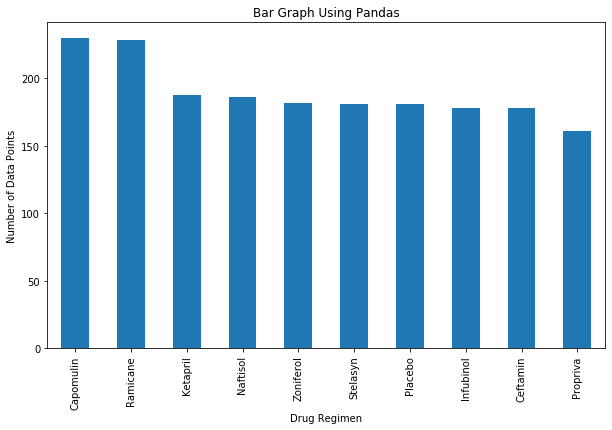

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Mouse ID, dtype: int64

<Figure size 432x288 with 0 Axes>

In [106]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
data_points = combined_data_df.groupby(["Drug Regimen"]).count()['Mouse ID'].sort_values(ascending=False)

data_points.plot(kind="bar", figsize=(10,6))

plt.title('Bar Graph Using Pandas')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()
plt.tight_layout()

data_points

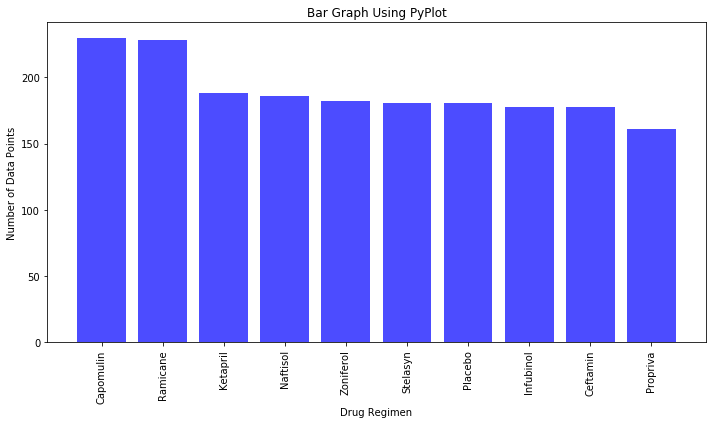

In [107]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


numofpoints=[230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(data_points))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,6))
plt.bar(x_axis, numofpoints, color='blue', alpha=0.7, align='center')
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
                           'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'], rotation='vertical')
plt.title('Bar Graph Using PyPlot')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.tight_layout()
plt.show()



## Pie Plots

/opt/anaconda3/envs/PythonDataViz/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


(-1.1007415699207657,
 1.1016946163825478,
 -1.2067664421469415,
 1.1059346302803437)

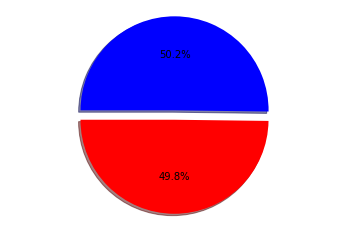

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_data_df.groupby(["Mouse ID", "Sex"])
gender_group
mouse_gender = pd.DataFrame(gender_group.size())
# count mouse
count_mouse = pd.DataFrame(mouse_gender.groupby(['Sex']).count())
colors = ['red', 'blue']
explode = (0.1, 0)
plt.pie(count_mouse, explode=explode, colors=colors, startangle=180, autopct="%1.1f%%", shadow=True)
plt.axis("equal")

(-1.100738623826109,
 1.1016881556114846,
 -1.2067595127126864,
 1.1059309614378074)

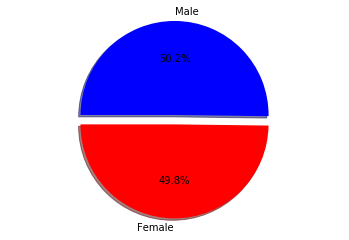

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = ["49.8", '50.2']
colors = ['red', 'blue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
       shadow=True, startangle=180)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_drug = combined_data_df[combined_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_drug = best_regimes.sort_values(["Timepoint"], ascending=True)
best_drug

best_drug_data = best_drug[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_drug_data



Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
0       Capomulin     b128          0           45.000000
30      Infubinol     c139          0           45.000000
31      Infubinol     v339          0           45.000000
32      Infubinol     a577          0           45.000000
33      Infubinol     y163          0           45.000000
...           ...      ...        ...                 ...
1888    Capomulin     r944         45           41.581521
1817    Capomulin     l897         45           38.846876
1855     Ceftamin     x581         45           64.634949
1786    Infubinol     a251         45           65.525743
1890     Ceftamin     p438         45           61.433892

[814 rows x 4 columns]

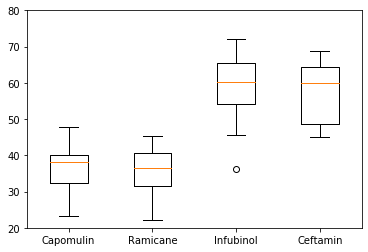

In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
best_drug_sort = best_drug_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_drug_sort.head(100)


top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_df = best_drug_sort.reset_index()
tumor_lists = final_tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_list_df
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(20, 80)
plt.show()




## Line and Scatter Plots

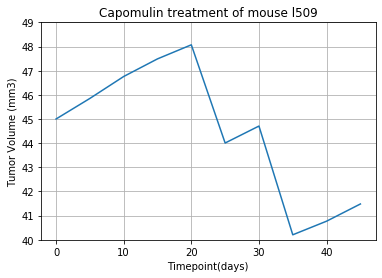

In [112]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_tumor_graph = combined_data_df[combined_data_df["Mouse ID"].isin(["l509"])]
time_tumor_graph

time_tumor_data = time_tumor_graph[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_tumor_data

x_axis = time_tumor_data["Timepoint"]
y_axis = time_tumor_data["Tumor Volume (mm3)"]
plt.ylim(40,49)
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.grid()
plt.show()



Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

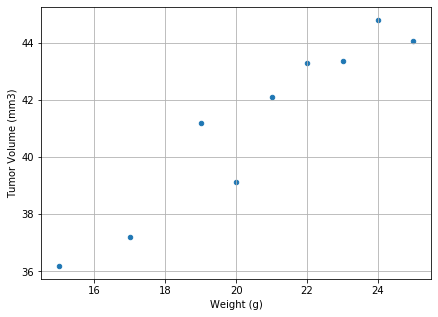

In [113]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_graph_df = combined_data_df[combined_data_df["Drug Regimen"].isin(["Capomulin"])]
scatter_graph_data = best_drug[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
scatter_plot = scatter_graph_df.reset_index()
sort = scatter_plot.sort_values(["Weight (g)"], ascending=True)
weight_group = scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
scatter_grouped_plot = pd.DataFrame(weight_group).reset_index()
plot = scatter_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (7,5))
weight_group

## Correlation and Regression

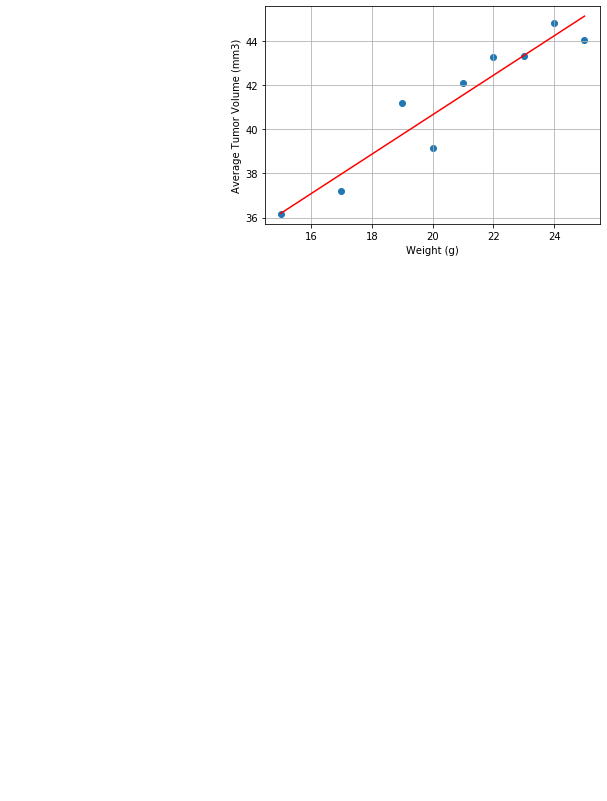

y =0.89x + 22.76
R2 is: 0.9034966277438602


In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatter_grouped_plot["Weight (g)"]
y_values = scatter_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()
print(line_eq)
print(f"R2 is: {rvalue**2}")

In [115]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.95
